#<center> Assignment 2

<center> Adarsh Reddy Madur 
<center> 210050091

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
inputs = keras.Input(shape=(28, 28))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="sigmoid")(x)
x = layers.Dense(128, activation="sigmoid")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable

In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)


In [5]:
Training_loss = []
Training_accuracy = []
Test_loss = []
Test_accuracy = []
epoch = []
i = 20

In [6]:
for i in range (0,20):
  epoch.append(i+1)
  history = model.fit(x_train, y_train, batch_size = 128, epochs = 1+i, initial_epoch = i)
  Training_loss.append(history.history['loss'][0])
  Training_accuracy.append(history.history['acc'][0])
  results = model.evaluate(x_test, y_test, batch_size=128)
  Test_loss.append(results[0])
  Test_accuracy.append(results[1])

79/79 [==============================] - 0s 3ms/step - loss: 0.2855 - acc: 0.9185
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.2072 - acc: 0.9380
Epoch 3/3
79/79 [==============================] - 0s 4ms/step - loss: 0.1656 - acc: 0.9502
Epoch 4/4
79/79 [==============================] - 0s 4ms/step - loss: 0.1386 - acc: 0.9587
Epoch 5/5
79/79 [==============================] - 0s 5ms/step - loss: 0.1212 - acc: 0.9624
Epoch 6/6
79/79 [==============================] - 0s 3ms/step - loss: 0.1072 - acc: 0.9669
Epoch 7/7
79/79 [==============================] - 0s 3ms/step - loss: 0.0964 - acc: 0.9698
Epoch 8/8
79/79 [==============================] - 0s 3ms/step - loss: 0.0921 - acc: 0.9709
Epoch 9/9
79/79 [==============================] - 0s 3ms/step - loss: 0.0809 - acc: 0.9742
Epoch 10/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0813 - acc: 0.9742
Epoch 11/11
79/79 [==============================] - 0s 3ms/step - loss: 0.0786 - acc: 0

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Training Accuracy')

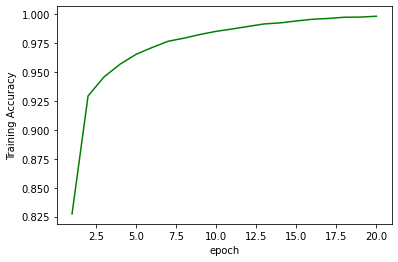

In [8]:
plt.plot(epoch ,Training_accuracy, 'g')
plt.xlabel('epoch')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Test Accuracy')

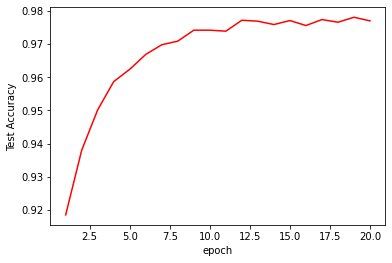

In [9]:
plt.plot(epoch ,Test_accuracy, 'r')
plt.xlabel('epoch')
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Training Loss')

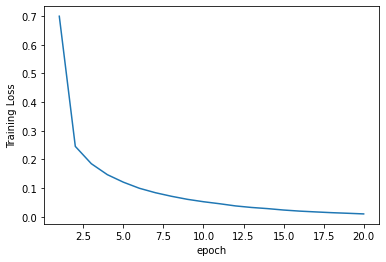

In [10]:
plt.plot(epoch ,Training_loss)
plt.xlabel('epoch')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Test Loss')

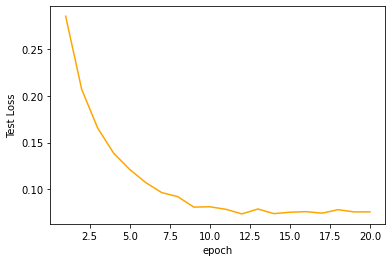

In [11]:
plt.plot(epoch ,Test_loss, color='orange')
plt.xlabel('epoch')
plt.ylabel('Test Loss')